In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
tqdm.pandas()

In [37]:

population=100 #total points in sample
width=10 #bouncing box bounds 
length=10 #bouncing box bounds
person_diam=0.6 #how far to get contaminated


In [38]:
pop=np.zeros((population,2)) 
pop[:,0]=np.random.uniform(low=0.1,high=width,size=population) #randomize locations
pop[:,1]=np.random.uniform(low=0.1,high=length,size=population)

velocities=np.zeros((population,2)) #randomize velocities
velocities[:,0]=np.random.uniform(low=0,high=0.5,size=population)
velocities[:,1]=np.random.uniform(low=0,high=0.5,size=population)

has_virus=np.zeros(population)
has_since=np.zeros(population)-1
has_virus[0]=1
has_since[0]=0
#has virus takes values 0: never had, 1 currenty has, 2 got over it
virus_duration=3#seconds

In [39]:
dt=0.001 #time step
TotalTime=15 #seconds total time

time=[]
num_clean=[]
num_infected=[]
num_cured=[]

for t in tqdm(range(int(TotalTime/dt))):
    
    for i in range(population): #get new positions
        
        pop[i,0]=pop[i,0]+velocities[i,0]*dt
        if pop[i,0]<0:
            pop[i,0]=-pop[i,0]
            velocities[i,0]=-velocities[i,0]
        if pop[i,0]>width:
            pop[i,0]=pop[i,0]+(width-pop[i,0])
            velocities[i,0]=-velocities[i,0]
        
        pop[i,1]=pop[i,1]+velocities[i,1]*dt
        if pop[i,1]<0:
            pop[i,1]=-pop[i,1]
            velocities[i,1]=-velocities[i,1]
        if pop[i,1]>length:
            pop[i,1]=pop[i,1]+(length-pop[i,1])
            velocities[i,1]=-velocities[i,1]
            
    dists=euclidean_distances(X=pop) #calculate distances between all samples
    
    for i in range(population): #see contamination spread
        if has_virus[i]==0:
            for j in range(population):
                if dists[i,j]<person_diam:
                    if has_virus[j]==1:
                        has_virus[i]=1
                        has_since[i]=t
                        
        elif has_virus[i]==1:
            if (t-has_since[i])*dt>virus_duration:
                has_virus[i]=2
        
    #get all data at timestep
    time.append(t)
    num_clean.append(len(has_virus[has_virus==0]))
    num_infected.append(len(has_virus[has_virus==1]))
    num_cured.append(len(has_virus[has_virus==2]))


    
    

100%|██████████| 15000/15000 [00:36<00:00, 405.69it/s]


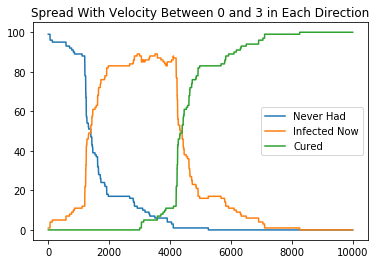

In [28]:
plt.plot(time,num_clean,label='Never Had')
plt.plot(time,num_infected,label='Infected Now')
plt.plot(time,num_cured,label='Cured')
plt.legend()
plt.title('Spread With Velocity Between 0 and 3 in Each Direction')
plt.show()

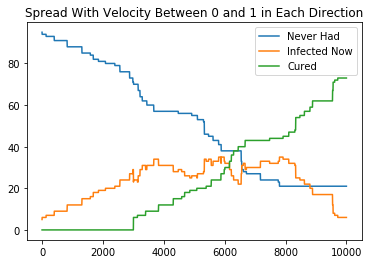

In [32]:
plt.plot(time,num_clean,label='Never Had')
plt.plot(time,num_infected,label='Infected Now')
plt.plot(time,num_cured,label='Cured')
plt.legend()
plt.title('Spread With Velocity Between 0 and 1 in Each Direction')
plt.show()

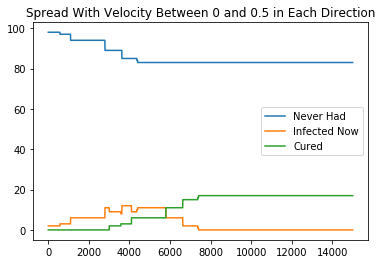

In [40]:
plt.plot(time,num_clean,label='Never Had')
plt.plot(time,num_infected,label='Infected Now')
plt.plot(time,num_cured,label='Cured')
plt.legend()
plt.title('Spread With Velocity Between 0 and 0.5 in Each Direction')
plt.show()